<a href="https://colab.research.google.com/github/zdanielshi/data_science_LFZ/blob/main/DS0621_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Titanic Example

In [3]:
titanic = pd.read_csv('/content/titanic.csv')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.drop(columns = ['Cabin', 'Name', 'PassengerId'], inplace=True)
titanic.info()

In [7]:
titanic.Age.fillna(titanic.Age.median(), inplace=True)
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace=True)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
# Survived is the target feature

In [9]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [10]:
titanic.Pclass = titanic.Pclass.apply(lambda x: 1 if x ==3 else 3 if x==1 else x)

In [11]:
titanic.SibSp = titanic.SibSp.astype('str')
titanic.Parch = titanic.Parch.astype('str')

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    object 
 5   Parch     891 non-null    object 
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 62.8+ KB


In [13]:
titanic = pd.get_dummies(titanic)

In [14]:
titanic

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,7.2500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3,38.0,71.2833,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,26.0,7.9250,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,3,35.0,53.1000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,35.0,8.0500,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,3,19.0,30.0000,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,1,28.0,23.4500,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
889,1,3,26.0,30.0000,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


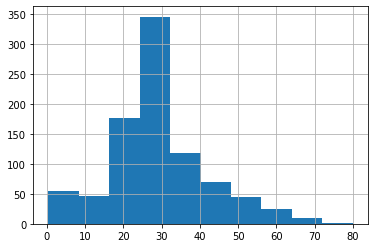

In [15]:
titanic.Age.hist();

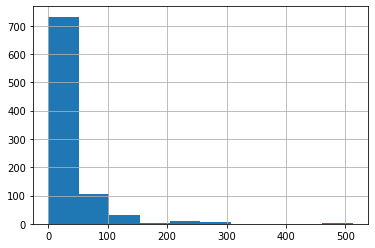

In [16]:
titanic.Fare.hist()

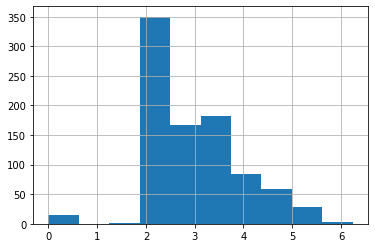

In [24]:
np.log1p(titanic.Fare).hist()

In [26]:
titanic.Fare = np.log1p(titanic.Fare)

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
rob = RobustScaler().fit(titanic[['Age', 'Fare']])

In [29]:
titanic[['Age','Fare']] = rob.transform(titanic[['Age', 'Fare']])

In [30]:
titanic

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0,1,-0.461538,-0.490934,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3,0.769231,1.206641,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,-0.153846,-0.429423,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,3,0.538462,0.980004,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0.538462,-0.418544,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.076923,-0.077295,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,3,-0.692308,0.544463,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,1,0.000000,0.358813,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
889,1,3,-0.153846,0.544463,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(titanic.loc[:,titanic.columns != 'Survived'], titanic.Survived, test_size = .33, random_state=0)

In [34]:
xtrain

,Pclass,Age,Fare,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
242,2,0.076923,-0.231153,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
344,2,0.615385,-0.077295,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
170,3,2.538462,0.628132,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
187,3,1.307692,0.452181,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
800,2,0.461538,-0.077295,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,3,0.846154,1.325612,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
192,1,-0.692308,-0.435652,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
629,1,0.000000,-0.446405,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
559,1,0.615385,0.136463,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
ytrain

242    0
344    0
170    0
187    1
800    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 596, dtype: int64

# Height Weight Exercise

In [36]:
data = pd.read_csv('/content/heightweight.csv')

In [37]:
data

,gender,ageYear,ageMonth,HeightIn,WeightLB
0,f,11.91667,143,56.3,85.0
1,f,12.91667,155,62.3,105.0
2,f,12.75000,153,63.3,108.0
3,f,13.41667,161,59.0,92.0
4,f,15.91667,191,62.5,112.5
...,...,...,...,...,...
232,m,13.66667,164,66.5,112.0
233,m,15.75000,189,65.0,114.0
234,m,13.66667,164,61.5,140.0
235,m,13.91667,167,62.0,107.5


In [38]:
df = data[['HeightIn', 'WeightLB']]

In [39]:
y = df['WeightLB']
y

0       85.0
1      105.0
2      108.0
3       92.0
4      112.5
       ...  
232    112.0
233    114.0
234    140.0
235    107.5
236     87.0
Name: WeightLB, Length: 237, dtype: float64

In [40]:
x = df['HeightIn']

In [ ]:
# y = mx + b

In [49]:
reg_values = stats.linregress(x, y)

In [50]:
reg_values.slope, reg_values.intercept

(3.818149030708701, -132.99100680678865)

In [51]:
reg_values.slope * (63) + reg_values.intercept

107.55238212785952

In [54]:
# write a function
def predict_weight(height):
  return reg_values.slope * height + reg_values.intercept

In [55]:
predict_weight(63)

107.55238212785952

Using ageMonth to predict weight

In [56]:
x = data.ageMonth
y = data.WeightLB

In [59]:
regress = stats.linregress(x,y)

In [61]:
slope = regress.slope
intercept = regress.intercept

In [62]:
def age_to_weight(age):
  return slope * age + intercept

In [65]:
age_to_weight(360)

232.26017530189986

Scatter plot

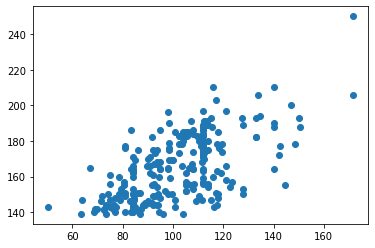

In [70]:
plt.scatter(data.WeightLB, data.ageMonth);

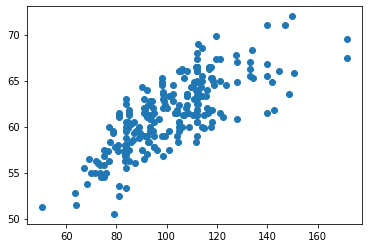

In [71]:
plt.scatter(data.WeightLB, data.HeightIn)

# Cars exercise

In [76]:
cars = pd.read_csv('/content/imports-85.data', header=None)

In [77]:
cars

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [85]:
cars.rename(columns ={25:'price'}, inplace=True)

In [86]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       205 non-null    object 
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       205 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      205 non-null    object 
 19  19      205 non-null    object 
 20  20      205 non-null    float64
 21  21      205 non-null    object 
 22  22

In [89]:
cars.price.value_counts()

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [90]:
cars[cars.price == '?']

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [92]:
# drop the ?
cars = cars[cars.price != '?']

In [94]:
cars['price'] = cars['price'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


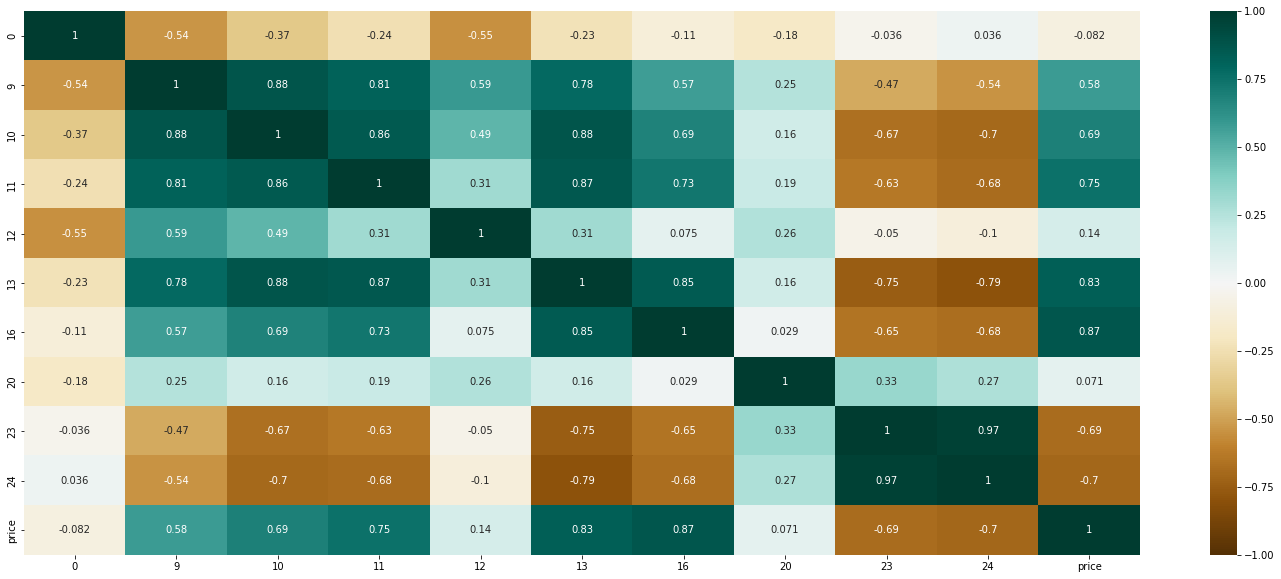

In [97]:
plt.figure(figsize = (25,10))
heatmap = sns.heatmap(cars.corr(), vmin=-1, vmax = 1, annot = True, cmap = 'BrBG')

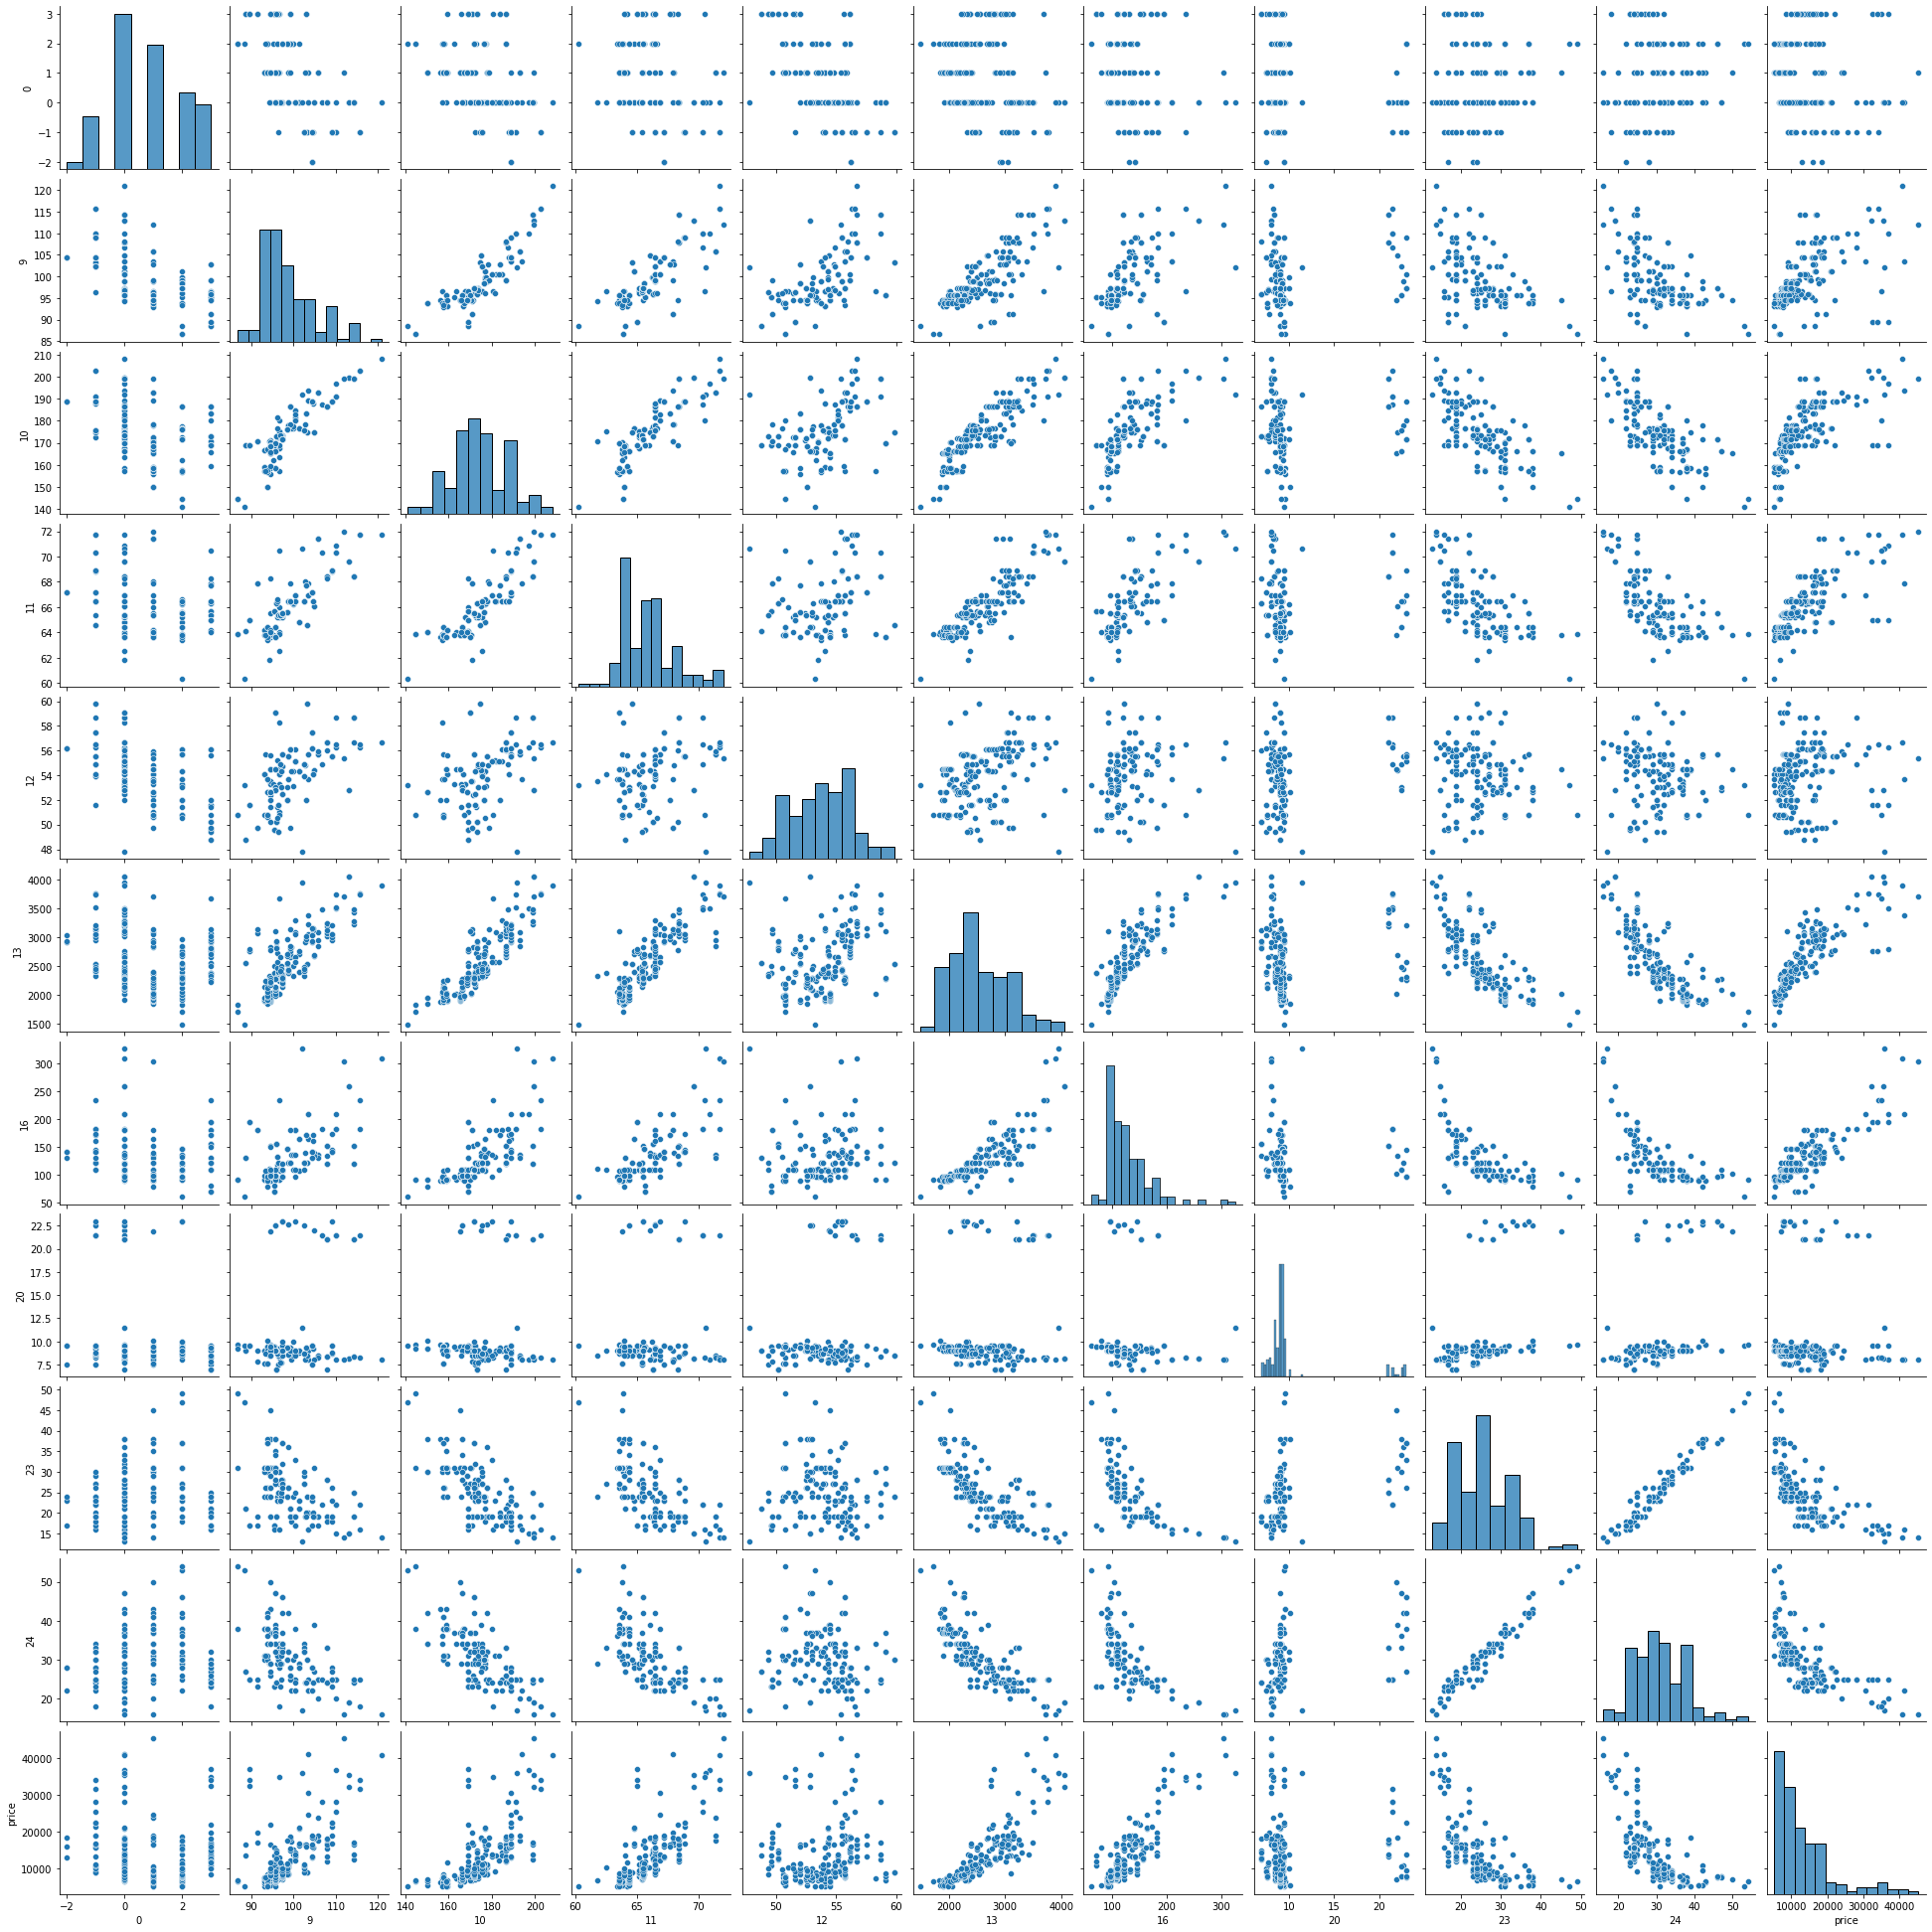

In [98]:
sns.pairplot(cars)

In [116]:
# feature 16 has the highest correlation and linearity
x = cars[16]
y = cars.price

In [117]:
cars_regress = stats.linregress(x, y)
cars_regress

LinregressResult(slope=166.8600156914162, intercept=-7963.338906281075, rvalue=0.8723351674455198, pvalue=9.265491622189913e-64, stderr=6.629332440878278)

In [118]:
slope = cars_regress.slope
intercept = cars_regress.intercept

In [119]:
def cars_price(variable):
  return slope * variable + intercept

In [129]:
cars[16].describe()

count    201.000000
mean     126.875622
std       41.546834
min       61.000000
25%       98.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: 16, dtype: float64

In [121]:
cars_price(2500)

409186.70032225945

In [128]:
for i, v in enumerate(cars[16]):
  print(str(v) + ": " + str(cars_price(v)))

130: 13728.463133603032
130: 13728.463133603032
152: 17399.38347881419
109: 10224.402804083293
136: 14729.62322775153
136: 14729.62322775153
136: 14729.62322775153
136: 14729.62322775153
131: 13895.323149294447
108: 10057.542788391875
108: 10057.542788391875
164: 19401.703667111182
164: 19401.703667111182
164: 19401.703667111182
209: 26910.404373224912
209: 26910.404373224912
209: 26910.404373224912
61: 2215.122050895314
90: 7054.062505946384
90: 7054.062505946384
90: 7054.062505946384
90: 7054.062505946384
98: 8388.942631477714
90: 7054.062505946384
90: 7054.062505946384
90: 7054.062505946384
98: 8388.942631477714
122: 12393.583008071702
156: 18066.823541579855
92: 7387.782537329216
92: 7387.782537329216
79: 5218.602333340807
92: 7387.782537329216
92: 7387.782537329216
92: 7387.782537329216
92: 7387.782537329216
110: 10391.262819774707
110: 10391.262819774707
110: 10391.262819774707
110: 10391.262819774707
110: 10391.262819774707
110: 10391.262819774707
111: 10558.122835466125
119: 11

In [132]:
mean_squared_error(cars.price, cars[16])

233363228.99004975

In [133]:
np.sqrt(mean_squared_error(cars.price, cars[16]))

15276.230850247379